## 数据收集

In [1]:
import requests
import os
import pandas as pd
import json
from pprint import pprint

In [ ]:
#Download image-predictions.tsv via requests
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' #file addr
response = requests.get(url, stream=True)   
handle = open('image-predictions.tsv', "wb")
for chunk in response.iter_content(chunk_size=512):
    if chunk:  # filter out keep-alive new chunks
        handle.write(chunk)

In [ ]:
#get more message via tweepy API
#all key have been replace by *，if you want to run the code ,please input the key first
import tweepy
consumer_key = ******
consumer_secret = ******
access_token = ******
access_secret = ******
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)
for i in df.tweet_id:                                
    try:
        tweet=api.get_status(i,tweet_mode='extended')
    except Exception as e:                          
        print(e)
    with open('tweet_json.txt','a') as file:
        json.dumps(tweet._json)

In [ ]:
#create a dataframe
tweet_favourite_retweet=[]
with open('tweet_json.txt','r') as json_file:    #loads the json file
    for i in json_file:
        twee=json.loads(i)
        tweet_id=twee['id']
        favourite=twee['favorite_count']
        retweet=twee['retweet_count']
        tweet_favourite_retweet.append({'tweet_id':int(tweet_id),
                                       'favourite_count':int(favourite),
                                       'retweet_count':int(retweet)})
df = pd.DataFrame(tweet_favourite_retweet, columns = ['tweet_id', 'favourite_count', 'retweet_count'])
df.to_csv('tweet_favourite_retweet.csv',index=False) #save dataframe to csv file parameter=‘index=False’ no need to save index

## 数据评估

In [2]:
# read twitter-archive-enhanced.csv
twitter=pd.read_csv('twitter-archive-enhanced.csv')
image_pre=pd.read_csv('image-predictions.tsv',sep='\t')
tweet_favourite_retweet=pd.read_csv('tweet_favourite_retweet.csv')

### 通过可视化和编程评估

In [3]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
image_pre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
tweet_favourite_retweet.head()

,tweet_id,favourite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721


In [6]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
tweet_favourite_retweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id           2352 non-null int64
favourite_count    2352 non-null int64
retweet_count      2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [9]:
all_columns = pd.Series(list(twitter) + list(image_pre) + list(tweet_favourite_retweet))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [10]:
list(twitter)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [11]:
twitter[twitter['tweet_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
image_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
tweet_favourite_retweet.describe()

,tweet_id,favourite_count,retweet_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,8109.198980,3134.932398
std,6.846210e+16,11980.795669,5237.846296
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,1417.000000,618.000000
50%,7.193536e+17,3596.500000,1456.500000
75%,7.991219e+17,10118.000000,3628.750000
max,8.924206e+17,132318.000000,79116.000000


In [15]:
twitter.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1995,672594978741354496,NaN,NaN,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,None,None,pupper,None
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
1751,678991772295516161,NaN,NaN,2015-12-21 17:33:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",If your Monday isn't going so well just take a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678991772...,12,10,None,None,None,None,None
1416,698635131305795584,NaN,NaN,2016-02-13 22:29:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing five Guatemalan Birch F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698635131...,12,10,None,None,None,None,None
1529,690248561355657216,NaN,NaN,2016-01-21 19:04:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxwell. That's his moped. He rents it...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690248561...,11,10,Maxwell,None,None,None,None
67,879376492567855104,NaN,NaN,2017-06-26 16:31:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jack AKA Stephen Furry. You're not sco...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879376492...,12,10,Jack,None,None,None,None
2172,669327207240699904,NaN,NaN,2015-11-25 01:30:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just got home from college. Dis my dog. She do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669327207...,13,10,None,None,None,None,None
1844,675849018447167488,6.758457e+17,4.196984e+09,2015-12-13 01:25:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is being demoted to a 9/10 for not we...,NaN,NaN,NaN,NaN,9,10,None,None,None,None,None
700,786233965241827333,NaN,NaN,2016-10-12 15:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mattie. She's extremely dangerous. Wil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786233965...,11,10,Mattie,None,None,None,None
1533,689999384604450816,NaN,NaN,2016-01-21 02:34:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Covach. He's trying to melt the snow. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689999384...,10,10,Covach,None,None,None,None


In [16]:
twitter.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
an            7
Bailey        7
Daisy         7
Toby          7
Buddy         7
Stanley       6
Jax           6
Leo           6
Rusty         6
Bella         6
Scout         6
Milo          6
Dave          6
Koda          6
Jack          6
Oscar         6
Oakley        5
           ... 
Bobble        1
Brian         1
Millie        1
Clyde         1
Sora          1
Andru         1
Blanket       1
Snoopy        1
Ron           1
Reagan        1
Sonny         1
Brandy        1
Lillie        1
Beemo         1
Jett          1
Kloey         1
Grizzie       1
Stormy        1
Jameson       1
Noah          1
Nugget        1
Pawnd         1
Link          1
Coleman       1
Cupid         1
Sunshine      1
Combo         1
Rilo          1
Marlee        1
Jaspers       1
Name: name, Length: 957,

In [17]:
twitter[twitter.name=='an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [18]:
twitter[twitter.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [19]:
type(twitter.timestamp[0])

str

In [20]:
image_pre.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
97,667728196545200128,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,1,kuvasz,0.360159,True,golden_retriever,0.293744,True,Labrador_retriever,0.270673,True
593,679475951516934144,https://pbs.twimg.com/media/CW37xZbUoAAUXe5.jpg,1,Maltese_dog,0.145742,True,toy_poodle,0.139407,True,West_Highland_white_terrier,0.108821,True
1174,737322739594330112,https://pbs.twimg.com/media/Cjt_Hm6WsAAjkPG.jpg,1,guinea_pig,0.148526,False,solar_dish,0.097183,False,park_bench,0.059312,False
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1708,817827839487737858,https://pbs.twimg.com/ext_tw_video_thumb/81782...,1,cocker_spaniel,0.387608,True,golden_retriever,0.264844,True,Pekinese,0.122123,True
457,674781762103414784,https://pbs.twimg.com/media/CV1ObvEWcAA7c6i.jpg,1,ocarina,0.148975,False,hamster,0.068985,False,wool,0.031728,False
458,674788554665512960,https://pbs.twimg.com/media/CV1Um8vWIAAmhQn.jpg,1,miniature_poodle,0.349561,True,toy_poodle,0.154711,True,Maltese_dog,0.134229,True
1217,743595368194129920,https://pbs.twimg.com/media/ClHICHmXEAI_1PS.jpg,1,hippopotamus,0.505675,False,hog,0.370726,False,warthog,0.018827,False
1248,747816857231626240,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,1,Pembroke,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True
1823,834931633769889797,https://pbs.twimg.com/media/C5ZF4p-XEAEmApg.jpg,1,ice_bear,0.330573,False,soft-coated_wheaten_terrier,0.196476,True,Irish_terrier,0.073097,True


In [21]:
image_pre.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
teddy                         18
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
beagle                        18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

## 质量

### twitter
- source 含有格式字符 ‘<a href=’
- timestamp 时间格式错误
- name 名字提取错误，有英文助词‘a’，‘an’，etc
- in_reply_to_status_id、retweeted_status_user_id、retweeted_status_id、retweeted_status_user_id 数据格式错误
- 部分rating_numerator/rating_denominator 提取错误
- retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,只需要原始数据，不需要转发的数据
- tweet_id列是int数据类型
### image_pre
- p1/p2/p3 名字首字母大小写没有统一
- p1_conf/p2_conf/p3_conf 数据不是百分比表示

## 清洁度

- rating_numerator与rating_denominator分开两列
- twitter/image_pre/tweet_favourite_retweet分开不同的表格,缺favourite_count，retweet_count

## 数据清理

In [22]:
twitter_clean=twitter.copy()
image_pre_clean=image_pre.copy()
tweet_favourite_retweet_clean=tweet_favourite_retweet.copy()

- source 含有格式字符 <a href=,</a>

### 定义
    使用正则表达式对字符串提取文本内容，把格式字符去掉

### 代码

In [23]:
import re
#定义一个对超链接提取文本内容的函数get_content
def get_content(url):
    res=r'<a .*?>(.*?)</a>'
    text=re.findall(res,url,re.S|re.M)
    return text
    

In [24]:
twitter_clean['source']=twitter_clean.source.apply(get_content)

### 测试

In [25]:
twitter_clean.source.sample(25)

609     [Twitter for iPhone]
1172    [Twitter for iPhone]
1813    [Twitter for iPhone]
1935    [Twitter for iPhone]
1160    [Twitter for iPhone]
83      [Twitter for iPhone]
1590    [Twitter for iPhone]
2181    [Twitter for iPhone]
1794    [Twitter for iPhone]
177     [Twitter for iPhone]
247     [Twitter for iPhone]
1814    [Twitter for iPhone]
1579    [Twitter for iPhone]
1518    [Twitter for iPhone]
1698    [Twitter for iPhone]
741     [Twitter for iPhone]
2208    [Twitter for iPhone]
19      [Twitter for iPhone]
2205    [Twitter for iPhone]
120     [Twitter for iPhone]
2353    [Twitter for iPhone]
2261    [Twitter Web Client]
1382    [Twitter for iPhone]
355     [Twitter for iPhone]
687     [Twitter for iPhone]
Name: source, dtype: object

- timestamp 时间格式错误

### 定义
    用pandas的to_datetime函数修改str to date time

### 代码

In [26]:
twitter_clean.timestamp=pd.to_datetime(twitter_clean.timestamp)

### 测试

In [27]:
twitter_clean.timestamp.sample(5)

2316   2015-11-17 16:09:56
1496   2016-01-28 02:12:04
861    2016-08-09 20:03:43
2097   2015-11-28 22:38:01
2067   2015-11-30 01:39:49
Name: timestamp, dtype: datetime64[ns]

- name 名字提取错误，有英文助词,形容词，副词等‘a’，‘an’，etc

### 定义

- 用pd.replace 函数，把异常的值替换成正确的，查看对应的text文本，没有名字的替换成None

In [28]:
names=['an','a','O','the','just','not','one','mad','officially','very','quite','my',
     'by','getting','this','unacceptable','such','actually','old','life','all','his',
     'infuriating','light','space']
for name in names:
    twitter_clean.name=twitter_clean.name.replace(name,None)
twitter_clean.name=twitter_clean.name.replace('O','O\'Malley')
twitter_clean.name=twitter_clean.name.replace('my','Zoey')
twitter_clean.name=twitter_clean.name.replace('his','Quizno')

### 测试

In [29]:
for name in names:
    print(twitter_clean[twitter_clean.name==name])

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweete

In [30]:
twitter_clean[twitter_clean.name=='O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
twitter_clean[twitter_clean.name=='my']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [32]:
twitter_clean[twitter_clean.name=='his']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [33]:
twitter_clean.name.value_counts()

None        789
Oliver       13
Charlie      12
Lucy         11
Cooper       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Daisy         8
Sadie         8
Stanley       7
Toby          7
Bailey        7
Buddy         7
Leo           6
Louis         6
Koda          6
Scout         6
Milo          6
Jax           6
Dave          6
Walter        6
Rusty         6
Oscar         6
Jack          6
Bella         6
Bentley       6
Alfie         5
           ... 
Bobble        1
Brian         1
Millie        1
Clyde         1
Sora          1
Jareld        1
Cuddles       1
Harry         1
Andru         1
Tommy         1
Nugget        1
Lillie        1
Beemo         1
Kloey         1
Grizzie       1
Stormy        1
Sky           1
Joshwa        1
Jameson       1
Pawnd         1
Blanket       1
Link          1
Coleman       1
Cupid         1
Sunshine      1
Combo         1
Rilo          1
Marlee        1
Noah          1
Mosby         1
Name: name, Length: 932,

- retweeted_status_user_id、retweeted_status_id、retweeted_status_user_id 数据格式错误
- in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,只需要原始数据，不需要转发的数据

### 定义
    把in_reply_to_status_id,in_reply_to_user_id,retweeted_status_user_id、retweeted_status_id、retweeted_status_user_id为non-null的所有条目删除（non-nullin_reply_to_status_id,in_reply_to_user_id,的retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp的所有行都被删除之后，这五列都为空，然后移除掉这五列）

### 代码

In [39]:
#过滤含转发的数据,并删除对应的列
column=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
        'retweeted_status_user_id','retweeted_status_timestamp']
twitter_clean=twitter_clean[twitter_clean.in_reply_to_status_id.isnull()]
twitter_clean=twitter_clean[twitter_clean.in_reply_to_user_id.isnull()]
twitter_clean=twitter_clean[twitter_clean.retweeted_status_id.isnull()]
twitter_clean=twitter_clean[twitter_clean.retweeted_status_timestamp.isnull()]
twitter_clean=twitter_clean[twitter_clean.retweeted_status_user_id.isnull()]
for col in column:
    del twitter_clean[col]

### 测试

In [41]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


- 部分rating_numerator/rating_denominator 提取错误
## 定义
    查找异常值，通过text比较是否提取错误，有错误的修改正确

## 代码

In [44]:
#因为分母通常为10，所以提取错误的大多发生在分母不为10的部分
twitter_clean[twitter_clean.rating_denominator!=10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,[Twitter for iPhone],The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,[Twitter for iPhone],Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,[Twitter for iPhone],Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,[Twitter for iPhone],"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,[Twitter for iPhone],Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,Solomon,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,[Twitter for iPhone],Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,[Twitter for iPhone],This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,[Twitter for iPhone],Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,[Twitter for iPhone],Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,[Twitter for iPhone],"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


In [45]:
twitter_clean['text'][902]

'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'

In [46]:
twitter_clean['text'][1068]

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [47]:
twitter_clean['rating_numerator'][1068]=14
twitter_clean['rating_denominator'][1068]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
twitter_clean['text'][1120]

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [49]:
twitter_clean['text'][1165]

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

In [50]:
twitter_clean['rating_numerator'][1165]=14
twitter_clean['rating_denominator'][1165]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
twitter_clean['text'][1202]

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [52]:
twitter_clean['rating_numerator'][1202]=11
twitter_clean['rating_denominator'][1202]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
twitter_clean['text'][1228]

"Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"

In [54]:
twitter_clean['text'][1254]

"Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"

In [55]:
twitter_clean['text'][1274]

'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'

In [56]:
twitter_clean['text'][1351]

"Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"

In [61]:
twitter_clean['text'][1433]

"Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"

In [62]:
twitter_clean['text'][1635]

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [63]:
twitter_clean['text'][1662]

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [66]:
twitter_clean['rating_numerator'][1662]=10
twitter_clean['rating_denominator'][1662]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
twitter_clean['text'][1779]

"IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"

In [68]:
twitter_clean['text'][1843]

'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'

In [69]:
twitter_clean['text'][2335]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [70]:
twitter_clean['rating_numerator'][2335]=9
twitter_clean['rating_denominator'][2335]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## 测试

In [73]:
twitter_clean.loc[1068]

tweet_id                                             740373189193256964
timestamp                                           2016-06-08 02:41:38
source                                             [Twitter for iPhone]
text                  After so many requests, this is Bretagne. She ...
expanded_urls         https://twitter.com/dog_rates/status/740373189...
rating_numerator                                                     14
rating_denominator                                                   10
name                                                               None
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 1068, dtype: object

In [74]:
twitter_clean.loc[1165]

tweet_id                                             722974582966214656
timestamp                                           2016-04-21 02:25:47
source                                             [Twitter for iPhone]
text                  Happy 4/20 from the squad! 13/10 for all https...
expanded_urls         https://twitter.com/dog_rates/status/722974582...
rating_numerator                                                     14
rating_denominator                                                   10
name                                                               None
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 1165, dtype: object

In [75]:
twitter_clean.loc[1202]

tweet_id                                             716439118184652801
timestamp                                           2016-04-03 01:36:11
source                                             [Twitter for iPhone]
text                  This is Bluebert. He just saw that both #Final...
expanded_urls         https://twitter.com/dog_rates/status/716439118...
rating_numerator                                                     11
rating_denominator                                                   10
name                                                           Bluebert
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 1202, dtype: object

In [76]:
twitter_clean.loc[1662]

tweet_id                                             682962037429899265
timestamp                                           2016-01-01 16:30:13
source                                             [Twitter for iPhone]
text                  This is Darrel. He just robbed a 7/11 and is i...
expanded_urls         https://twitter.com/dog_rates/status/682962037...
rating_numerator                                                     10
rating_denominator                                                   10
name                                                             Darrel
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 1662, dtype: object

In [77]:
twitter_clean.loc[2335]

tweet_id                                             666287406224695296
timestamp                                           2015-11-16 16:11:11
source                                             [Twitter for iPhone]
text                  This is an Albanian 3 1/2 legged  Episcopalian...
expanded_urls         https://twitter.com/dog_rates/status/666287406...
rating_numerator                                                      9
rating_denominator                                                   10
name                                                               None
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 2335, dtype: object

- tweet_id列是int数据类型

### 定义
    tweet_id列应该是object类型，用astype（）把int改成object。

### 代码

In [78]:
twitter_clean['tweet_id']=twitter_clean.tweet_id.astype('object')

In [79]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 293.0+ KB


### image_pre
- p1/p2/p3 名字首字母大小写没有统一

### 定义
    - 运用str.lower(),把名字改成全小写的

In [80]:
image_pre_clean.p1=image_pre_clean.p1.str.lower()
image_pre_clean.p2=image_pre_clean.p2.str.lower()
image_pre_clean.p3=image_pre_clean.p3.str.lower()

In [81]:
image_pre_clean.p1.sample(25)

1382                       pembroke
1204             labrador_retriever
839                         hamster
1352             labrador_retriever
1375                      seat_belt
1890          flat-coated_retriever
236                            chow
1637                         vizsla
315                      stone_wall
1110                    siamese_cat
628               shetland_sheepdog
709                             pug
1905                         prison
1351                 sussex_spaniel
1444             long-horned_beetle
160                brittany_spaniel
1331                       bluetick
694                        pembroke
1342                         barrow
485     west_highland_white_terrier
207                          vizsla
1669                    toy_terrier
682                     maltese_dog
990                           agama
1492                      seat_belt
Name: p1, dtype: object

In [82]:
image_pre_clean.p2.sample(25)

672                               chow
700                    norfolk_terrier
1381                labrador_retriever
1403                          pekinese
425                 kerry_blue_terrier
1437                          fur_coat
810                           malamute
50                           armadillo
1965                    siberian_husky
832                            doormat
960                 labrador_retriever
1694                           samoyed
401     american_staffordshire_terrier
1116                      bull_mastiff
1376                        toy_poodle
1678                  golden_retriever
1615                       toy_terrier
1909               rhodesian_ridgeback
2058                   tibetan_mastiff
481                           ice_bear
1930                labrador_retriever
1581                         seat_belt
346                         toy_poodle
1523                        pomeranian
1292                      studio_couch
Name: p2, dtype: object

In [83]:
image_pre_clean.p3.sample(25)

2043              bernese_mountain_dog
835                           shih-tzu
1744                     irish_terrier
191                    standard_poodle
1038                             pizza
952                         otterhound
538                              boxer
1949                             boxer
1909                  english_foxhound
1427    american_staffordshire_terrier
80                   yorkshire_terrier
735        german_short-haired_pointer
847                           pekinese
1156                             dhole
258                         brown_bear
204                  shetland_sheepdog
793                             kuvasz
1002                   norfolk_terrier
300                     shower_curtain
1382                 shetland_sheepdog
1337                          notebook
571                     great_pyrenees
857                             vacuum
276                         guinea_pig
517                           shih-tzu
Name: p3, dtype: object

- p1_conf/p2_conf/p3_conf 数据不是百分比表示

### 定义
    - 运用apply函数对 p1_conf/p2_conf/p3_conf的数据都乘以100

### 代码

In [84]:
image_pre_clean['p1_conf']=image_pre_clean['p1_conf'].apply(lambda x:x*100)
image_pre_clean['p2_conf']=image_pre_clean['p2_conf'].apply(lambda x:x*100)
image_pre_clean['p3_conf']=image_pre_clean['p3_conf'].apply(lambda x:x*100)

### 测试

In [85]:
image_pre_clean.p1_conf.head()

0    46.5074
1    50.6826
2    59.6461
3    40.8143
4    56.0311
Name: p1_conf, dtype: float64

In [86]:
image_pre_clean.p2_conf.head()

0    15.66650
1     7.41917
2    13.85840
3    36.06870
4    24.36820
Name: p2_conf, dtype: float64

In [87]:
image_pre_clean.p3_conf.head()

0     6.14285
1     7.20100
2    11.61970
3    22.27520
4    15.46290
Name: p3_conf, dtype: float64

## 清洁度
- twitter/image_pre/tweet_favourite_retweet分开不同的表格,缺favourite_count，retweet_count
## 定义
        通过pd.merge函数，how='inner'(可以删掉没有图片的推文条目)，将tweet_favourite_retweet的favourite_count,retweet_count，image_pre_clean,按照tweet_id合并到twitter_id_clean

## 代码

In [88]:
twitter_clean = pd.merge(twitter_clean, tweet_favourite_retweet_clean,
                            on=['tweet_id'], how='left')

In [89]:
twitter_clean = pd.merge(twitter_clean, image_pre_clean,
                            on=['tweet_id'], how='inner')

In [90]:
twitter_clean=twitter_clean.dropna()

## 测试

In [91]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 25 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
favourite_count       1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-

In [92]:
twitter_clean.sample(25)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1856,668113020489474048,2015-11-21 17:05:31,[Twitter for iPhone],This is Alfie. He's that one hypocritical gym ...,https://twitter.com/dog_rates/status/668113020...,6,10,Alfie,None,None,...,1,pembroke,54.88960,True,cardigan,19.11010,True,collie,5.981410,True
381,811386762094317568,2016-12-21 01:44:13,[Twitter for iPhone],This is Craig. That's actually a normal sized ...,https://twitter.com/dog_rates/status/811386762...,11,10,Craig,None,None,...,1,pembroke,80.41770,True,cardigan,18.98900,True,beagle,0.196475,True
80,873213775632977920,2017-06-09 16:22:42,[Twitter for iPhone],This is Sierra. She's one precious pupper. Abs...,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,...,1,vizsla,61.97820,True,bloodhound,33.80690,True,chesapeake_bay_retriever,1.267630,True
757,746131877086527488,2016-06-24 00:04:36,[Twitter for iPhone],This is Gustav. He has claimed that plant. It ...,https://twitter.com/dog_rates/status/746131877...,10,10,Gustav,None,None,...,1,chow,57.56370,True,pomeranian,19.59500,True,norwich_terrier,14.122400,True
1956,666094000022159362,2015-11-16 03:22:39,[Twitter for iPhone],This appears to be a Mongolian Presbyterian mi...,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,...,1,bloodhound,19.52170,True,german_shepherd,7.82598,True,malinois,7.562780,True
277,828372645993398273,2017-02-05 22:40:03,[Twitter for iPhone],This is Alexander Hamilpup. He was one of the ...,https://twitter.com/dog_rates/status/828372645...,12,10,Alexander,None,None,...,1,malamute,66.30470,True,eskimo_dog,20.77790,True,tibetan_mastiff,4.094880,True
1478,675853064436391936,2015-12-13 01:41:41,[Twitter for iPhone],Here we have an entire platoon of puppers. Tot...,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,...,1,labrador_retriever,86.83670,True,golden_retriever,4.33046,True,vizsla,2.820720,True
896,719704490224398336,2016-04-12 01:51:36,[Twitter for iPhone],This is Clyde. He's making sure you're having ...,https://twitter.com/dog_rates/status/719704490...,12,10,Clyde,None,None,...,1,home_theater,5.90326,False,window_shade,3.82990,False,bathtub,3.552820,False
1940,666418789513326592,2015-11-17 00:53:15,[Twitter for iPhone],This is Walter. He is an Alaskan Terrapin. Lov...,https://twitter.com/dog_rates/status/666418789...,10,10,Walter,None,None,...,1,toy_terrier,14.96800,True,papillon,14.82580,True,chihuahua,14.286000,True
76,874296783580663808,2017-06-12 16:06:11,[Twitter for iPhone],This is Jed. He may be the fanciest pupper in ...,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,None,None,...,1,cocker_spaniel,43.72160,True,miniature_poodle,27.71910,True,toy_poodle,15.740200,True


- rating_numerator与rating_denominator分开两列

### 定义
    把rating_numerator和rating_denominator合成一列'rating',作为实际WeRateDog评出的得分

### 代码

In [93]:
twitter_clean['rating']=twitter_clean.rating_numerator/twitter_clean.rating_denominator

### 测试

In [94]:
twitter_clean.rating.sample(25)

649     1.0
195     1.1
1526    0.3
1744    1.0
1759    1.1
570     1.2
1859    1.0
1343    0.9
1563    0.3
1799    1.2
49      1.4
1671    1.1
520     1.2
1395    1.2
1127    1.2
1544    0.8
1357    0.8
482     1.2
1609    1.1
797     1.0
428     1.3
1928    1.0
190     1.2
234     1.3
215     1.3
Name: rating, dtype: float64

In [95]:
#将清理完毕的数据保存为twitter-archive-master.csv
twitter_clean.to_csv('twitter-archive-master.csv',index=False,encoding=u'utf-8')

## 数据分析

通过对推特用户 WeRateDogs的数据档案进行数据分析，探索宠物狗评分高的因素

In [96]:
import pylab as pl
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
def Twitter_WeRateDog(key,name):
    key.hist()
    plt.ylabel('Count')
    plt.suptitle('Twitter WeRateDog by {}'.format(name))

In [97]:
twitter_master=pd.read_csv('twitter-archive-master.csv')

In [98]:
twitter_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,2017-08-01 16:23:56,['Twitter for iPhone'],This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,orange,9.70486,False,bagel,8.58511,False,banana,7.61100,False,1.3
1,892177421306343426,2017-08-01 00:17:27,['Twitter for iPhone'],This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,chihuahua,32.35810,True,pekinese,9.06465,True,papillon,6.89569,True,1.3
2,891815181378084864,2017-07-31 00:18:03,['Twitter for iPhone'],This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,chihuahua,71.60120,True,malamute,7.82530,True,kelpie,3.13789,True,1.2
3,891689557279858688,2017-07-30 15:58:51,['Twitter for iPhone'],This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,paper_towel,17.02780,False,labrador_retriever,16.80860,True,spatula,4.08359,False,1.3
4,891327558926688256,2017-07-29 16:00:24,['Twitter for iPhone'],This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,basset,55.57120,True,english_springer,22.57700,True,german_short-haired_pointer,17.52190,True,1.2


In [99]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 26 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
favourite_count       1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null floa

In [100]:
#用户点赞数统计
twitter_master['favourite_count'].describe()

count      1971.000000
mean       8977.030949
std       12456.033983
min          81.000000
25%        1992.000000
50%        4128.000000
75%       11367.000000
max      132318.000000
Name: favourite_count, dtype: float64

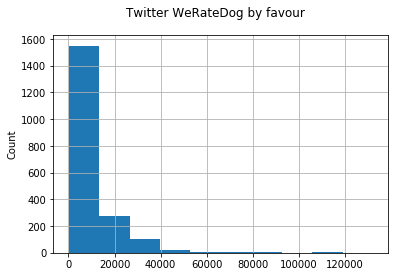

In [102]:
#用户点赞数统计直方图
Twitter_WeRateDog(twitter_master['favourite_count'],'favour')

In [103]:
#整体的转发统计
twitter_master['retweet_count'].describe()

count     1971.000000
mean      2787.830036
std       4739.182501
min         15.000000
25%        627.000000
50%       1362.000000
75%       3224.500000
max      79116.000000
Name: retweet_count, dtype: float64

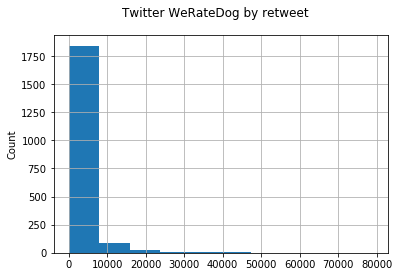

In [104]:
#用户转发数统计直方图
Twitter_WeRateDog(twitter_master['retweet_count'],'retweet')


统计的1971条信息中，平均点赞数是8977，标准偏差std=12456，最小的点赞数是81，最大的是132318， 由直方图可以看出，绝大多数的狗狗点赞数在20000以下；平均转发数是2787，标准偏差std=4739.18，同样的，绝大多数狗狗的转发数在10000以下。那么点赞数超两万的狗狗具备什么特征呢？它们的转发数是否一样居高。

In [111]:
#点赞高于20000
twitter_master_favour_hight=twitter_master[twitter_master['favourite_count']>20000] 

In [112]:
twitter_master_favour_hight['favourite_count'].describe()

count       259.000000
mean      33781.042471
std       17951.492512
min       20002.000000
25%       23087.000000
50%       28187.000000
75%       35844.000000
max      132318.000000
Name: favourite_count, dtype: float64

In [113]:
twitter_master_favour_hight['retweet_count'].describe()

count      259.000000
mean     10534.332046
std       9345.093286
min       3099.000000
25%       5337.500000
50%       7555.000000
75%      11692.500000
max      79116.000000
Name: retweet_count, dtype: float64

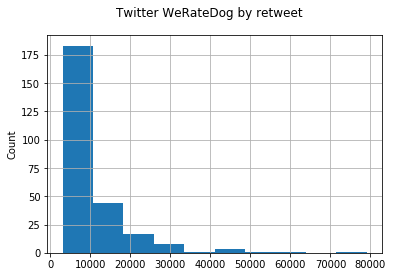

In [114]:
Twitter_WeRateDog(twitter_master_favour_hight['retweet_count'],'retweet')


可以看出，点赞数高于20000的，相应的转发数也高，平均值为10534，标准偏差std=9345，最大值79116。

那么点赞高，转发量跟狗狗的评分是否成正比，WeRateDog的评分是否跟用户的喜好一致

In [106]:
#过滤掉极值
twitter_master_new=twitter_master[twitter_master['rating_numerator']<100]
twitter_master_new=twitter_master_new[twitter_master_new['rating_denominator']==10]

In [107]:
twitter_master_new['rating_numerator'].describe()

count    1957.000000
mean       10.590189
std         2.665708
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        75.000000
Name: rating_numerator, dtype: float64

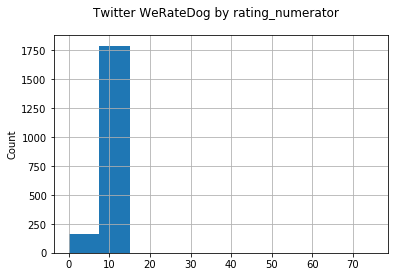

In [108]:
Twitter_WeRateDog(twitter_master_new['rating_numerator'],'rating_numerator')

In [109]:
twitter_master_favour_hight_new=twitter_master_new[twitter_master_new['favourite_count']>20000]
twitter_master_favour_hight_new['rating_numerator'].describe()

count    258.000000
mean      12.635659
std        4.113067
min        0.000000
25%       12.000000
50%       13.000000
75%       13.000000
max       75.000000
Name: rating_numerator, dtype: float64

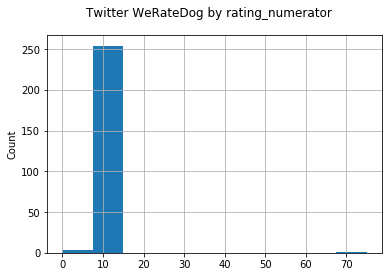

In [110]:
Twitter_WeRateDog(twitter_master_favour_hight_new['rating_numerator'],'rating_numerator')

通过对1957个数据的评分进行统计，发现平均值为10.59，标准偏差std=2.67，评分在11左右分布，比较集中;
其中点赞数超过20000的狗狗的评分平均值为12.64，标准偏差std=4.11，频率分布直方图跟总体的一样，都是集中 分布同一区间，相对点赞数跟转发数来说，这点差别并不明显。可见那么点赞高，转发量跟狗狗的评分不成正比， WeRateDog的评分跟用户的喜好没多大关系。

本次分析的结果是基于所收集的WeRateDog用户档案数据分析得出